# Model - Logistics Regression

Let us build some intuition around the Loan Data

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 18
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Load the dataset
df = pd.read_csv("data/loan_data_clean.csv")

In [4]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24


In [5]:
# Distribution of default

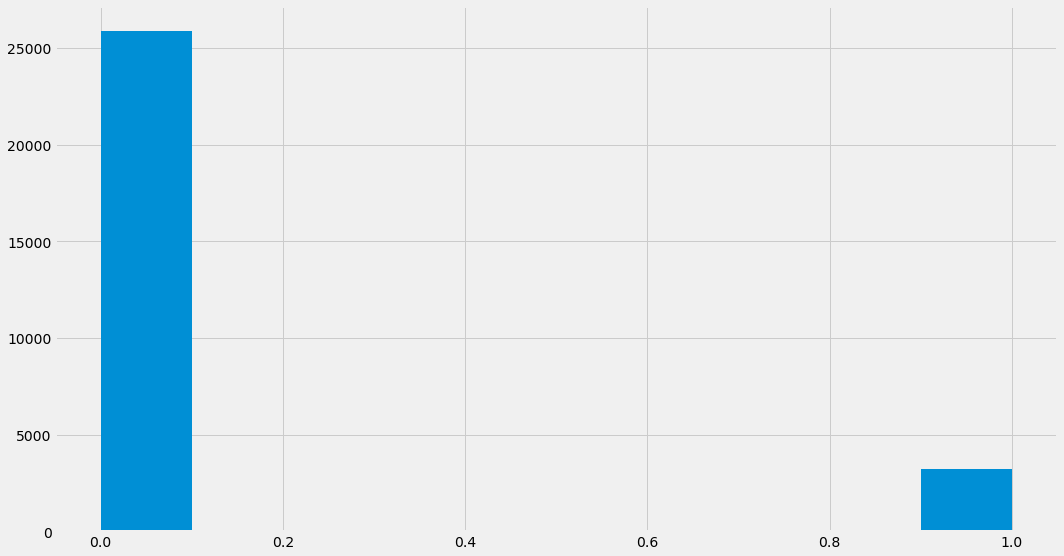

In [7]:
df.default.hist()

In [8]:
df.default.sum()/df.default.count()

0.11092777835069266

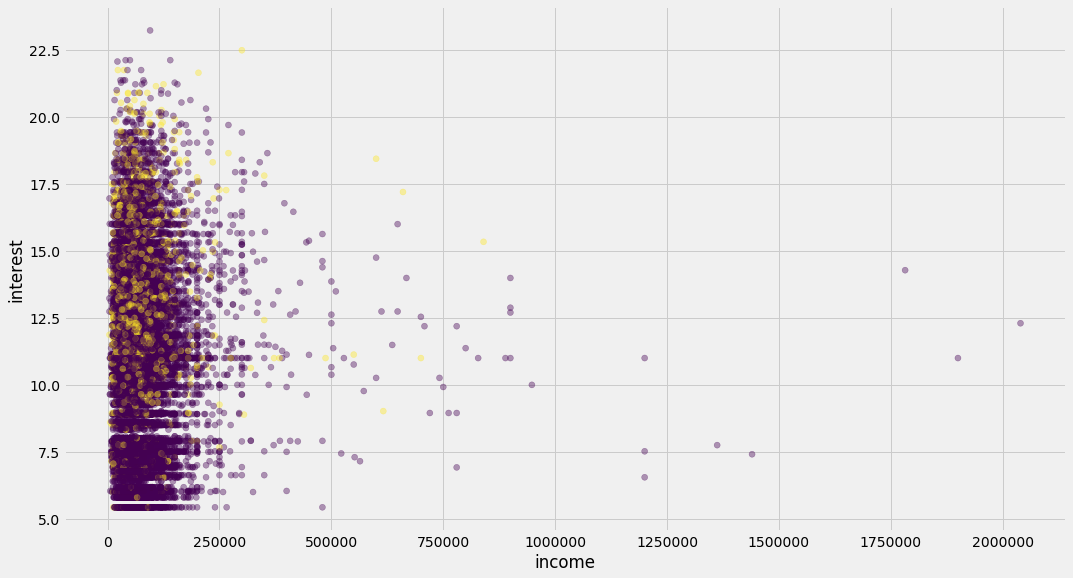

In [9]:
#Plot three variable - default vs income and interest
plt.scatter(df.income, df.interest, c=df.default, alpha=0.4)
plt.xlabel("income")
plt.ylabel("interest")

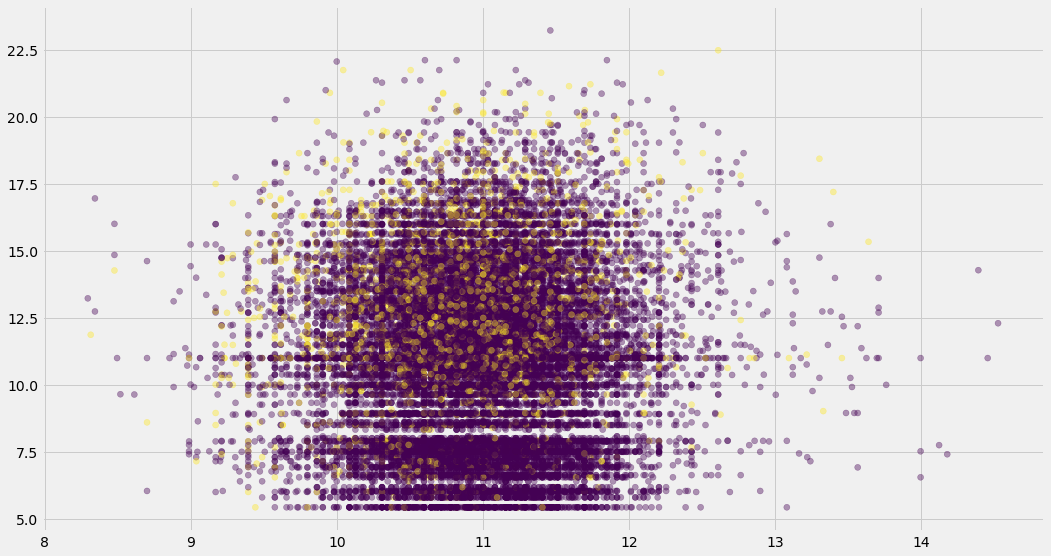

In [10]:
plt.scatter(np.log(df.income), df.interest, c=df.default, alpha=0.4)

##  Logistic Regression - Two Variable `income` and `interest`

In [11]:
# Get the module
from sklearn.linear_model import LogisticRegression

In [12]:
# Define the features
df['incomeLog'] = np.log(df.income)
X2 = df[['incomeLog', 'interest']]

In [13]:
# Define the target
y=df.default

In [15]:
# Initiate the model
clf = LogisticRegression()

In [16]:
#Fit the model
clf.fit(X2, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Calculate the Accuracy Score
clf.score(X2,y)

0.88907222164930733

In [22]:
# Calculate the predictions
clf.predict(X2)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
clf.predict(X2).sum()

0

In [24]:
# Calculate the probabilities
clf.predict_proba(X2)

array([[ 0.86339483,  0.13660517],
       [ 0.81430966,  0.18569034],
       [ 0.85198499,  0.14801501],
       ..., 
       [ 0.94785985,  0.05214015],
       [ 0.96513583,  0.03486417],
       [ 0.85217582,  0.14782418]])

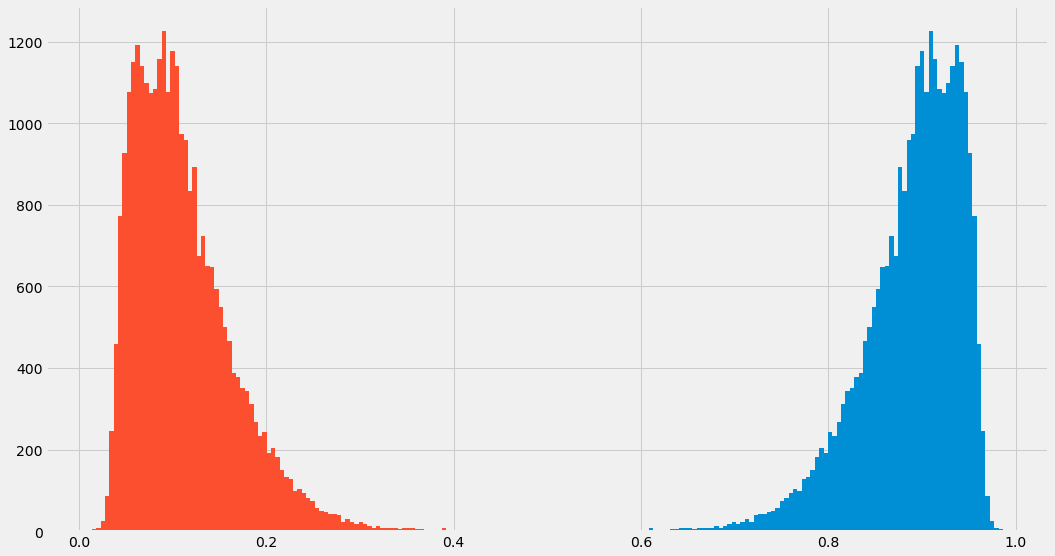

In [38]:
plt.hist(clf.predict_proba(X2)[:,0], bins=100)
plt.hist(clf.predict_proba(X2)[:,1], bins=100)
plt.show()

### Plot the Decision Boundaries

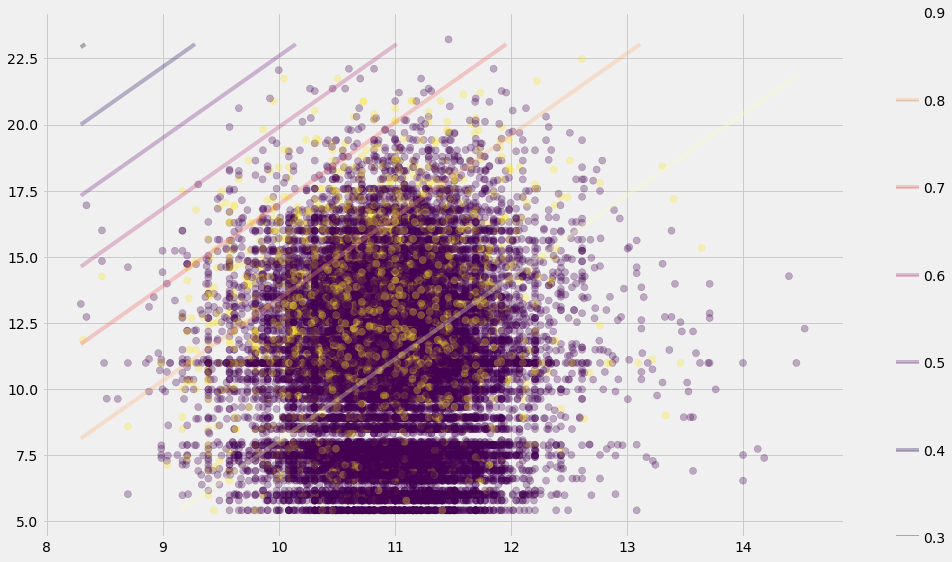

In [41]:
def plot_classifier(X,y,clf):
    x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max()
    x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max()
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, (x1_max - x1_min)/100), 
                           np.arange(x2_min, x2_max, (x2_max - x2_min)/100))
    Z = clf.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,0]
    Z = Z.reshape(xx1.shape)
    cs = plt.contour(xx1, xx2, Z, cmap="magma", alpha = 0.3)
    plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c = y, s = 50, cmap="viridis", alpha=0.3)
    plt.colorbar(cs)
    

plot_classifier(X2,y,clf)

In [42]:
x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max()
x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, (x1_max - x1_min)/100), 
                       np.arange(x2_min, x2_max, (x2_max - x2_min)/100))
xx = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]

NameError: name 'X' is not defined

In [32]:
Z = clf_logistic_2.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,0]
Z = Z.reshape(xx1.shape)
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.viridis, alpha = 0.3)
plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c = y, s = 50, cmap=plt.cm.magma)
plt.colorbar(cs)
plt.xlabel('age')
plt.ylabel('years')

NameError: name 'clf_logistic_2' is not defined

Exercise: What is the range of the predicted probabilities

In [43]:
from sklearn .tree import DecisionTreeClassifier

In [44]:
clf_dt = DecisionTreeClassifier()

In [47]:
clf_dt.fit(X2,y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='false', random_state=None, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort='false', random_state=None, splitter='best')

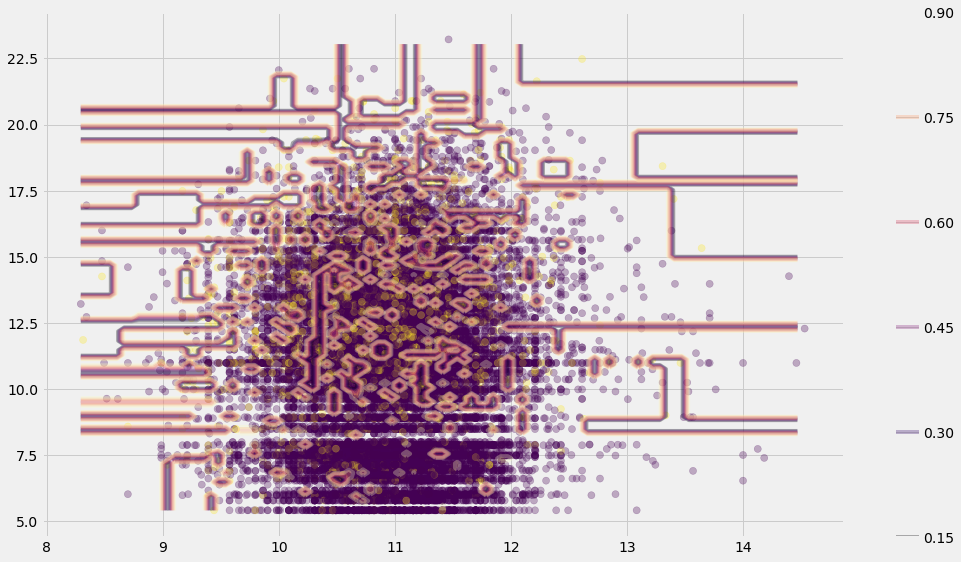

In [48]:
plot_classifier(X2,y,clf_dt)

Exercise: What is the accuracy measure if you change the cut-off threshold

## Logistic Regression - All Variables

In [11]:
# Preprocess the data

In [65]:
# Build the Model

In [1]:
# Choose a Threshold

In [2]:
# Calculate the accuracy

## Calculate the  error metric
- Accuracy
- Precision
- Recall
- Sensitivity
- Specificity
- Receiver Operating Curve
- Area Under the Curve

## Choosing the Error Metric
What is a good error metric to choose in this case?

## Regularization - L1 and L2

## Feature Selection